In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load breast cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Check for missing values
print(df.isnull().sum())  # No missing values

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [3]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train, predict and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        "Accuracy": acc,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }


                     Accuracy
Logistic Regression  0.973684
SVM                  0.973684
Random Forest        0.964912
Decision Tree        0.947368
KNN                  0.947368


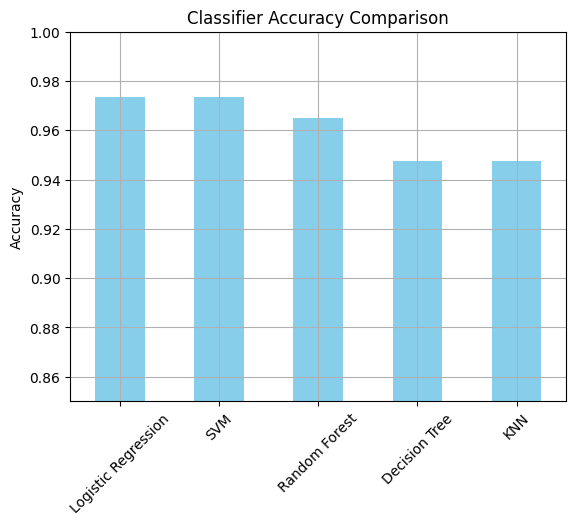

In [4]:
# Display accuracy of all models
accuracy_results = {model: metrics["Accuracy"] for model, metrics in results.items()}
accuracy_df = pd.DataFrame.from_dict(accuracy_results, orient='index', columns=["Accuracy"]).sort_values(by="Accuracy", ascending=False)
print(accuracy_df)

# Visualize comparison
accuracy_df.plot(kind='bar', legend=False, title="Classifier Accuracy Comparison", color='skyblue')
plt.ylabel("Accuracy")
plt.ylim(0.85, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
